# Imports

In [1]:
import cv2
import numpy as np
from skimage import restoration, filters
from skimage.util import random_noise
from skimage.io import imread
from skimage.color import rgb2gray
from skimage.io import imsave
import matplotlib.pyplot as plt
%matplotlib inline

# Atividades

1) Leia uma imagem colorida, transforme a mesma em níveis de cinza e salve o resultado em disco. 

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


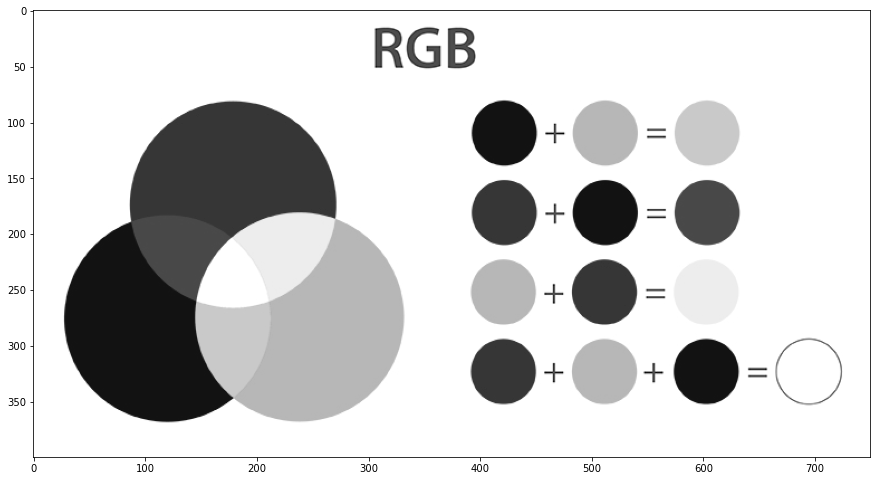

In [27]:
image = imread('image_02.jpg')
gray_image = rgb2gray(image)
imsave('image_question_01.png',gray_image)

plt.figure(figsize=(15,30))
plt.imshow(gray_image, cmap="gray")

2) Leia uma imagem colorida, transforme a mesma em níveis de cinza. Após isso, atribua o valor zero a todos os pixels cujo vizinho à direita tenha o mesmo valor de intensidade. Salve o resultado em disco.

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


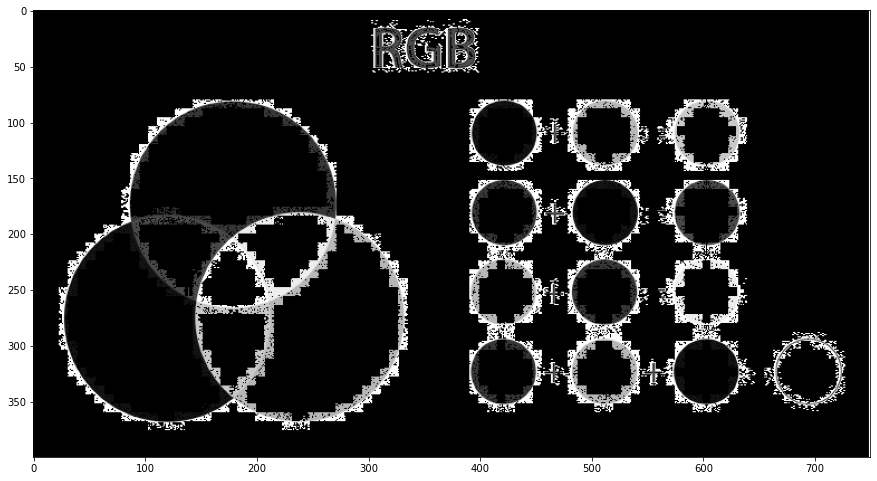

In [28]:
image = imread('image_02.jpg')
image = rgb2gray(image)

linhas,colunas = image.shape

for l in range(linhas):
    for c in range(colunas):
        if (c+1 < colunas):
            if (image[l,c] == image[l,c+1]):
                image[l,c] = 0

imsave('image_question_02.png',image)
            
plt.figure(figsize=(15,30))
plt.imshow(image, cmap="gray")

3) Leia uma imagem colorida, calcule as componentes no modelo de cores RGB. Calcule a maior e menor intensidade dos pixels em cada componente.

In [41]:
image = imread('image_02.jpg')

rows,columns,dimension = image.shape

ValueP = [[0, 255], [0, 255], [0, 255]]

for r in range(rows):
    for c in range(columns):
        for d in range(dimension):
            if(image[r,c,d] > ValueP[d][0]):
                ValueP[d][0] = image[r,c,d] 
            
            if(image[r,c,d] < ValueP[d][1]):
                ValueP[d][1] = image[r,c,d]
            
print("""
RED:\n
    MAIOR: {}\n
    MENOR: {}\n
\n
GREE:\n
    MAIOR: {}\n
    MENOR: {}\n
\n  
BLUE:\n
    MAIOR: {}\n
    MENOR: {}\n
""".format(ValueP[0][0],ValueP[0][1], ValueP[1][0], ValueP[1][1], ValueP[2][0],ValueP[2][1]))


RED:

    MAIOR: 255

    MENOR: 0



GREE:

    MAIOR: 255

    MENOR: 0


  
BLUE:

    MAIOR: 255

    MENOR: 0




4) Leia uma imagem colorida, calcule as componentes no modelo de cores RGB.  Atribua o valor 255 a todos os pixels com intensidade maior que 150, faça isso em cada componente. Após isso, junte as componentes para formar uma imagem colorida novamente e salve o resultado.

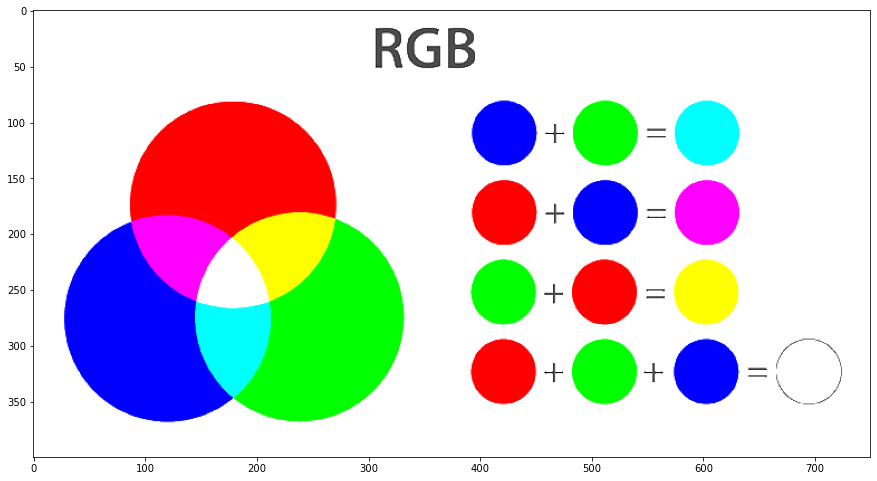

In [45]:
image = imread('image_02.jpg')

rows,columns,_ = image.shape

for r in range(rows):
    for c in range(columns):
        if (image[r,c,0] > 150):
            image[r,c,0] = 255
        if (image[r,c,1] > 150):
            image[r,c,1] = 255
        if (image[r,c,2] > 150):
            image[r,c,2] = 255

imsave('image_question_04.png',image)
            
plt.figure(figsize=(15,30))
plt.imshow(image)

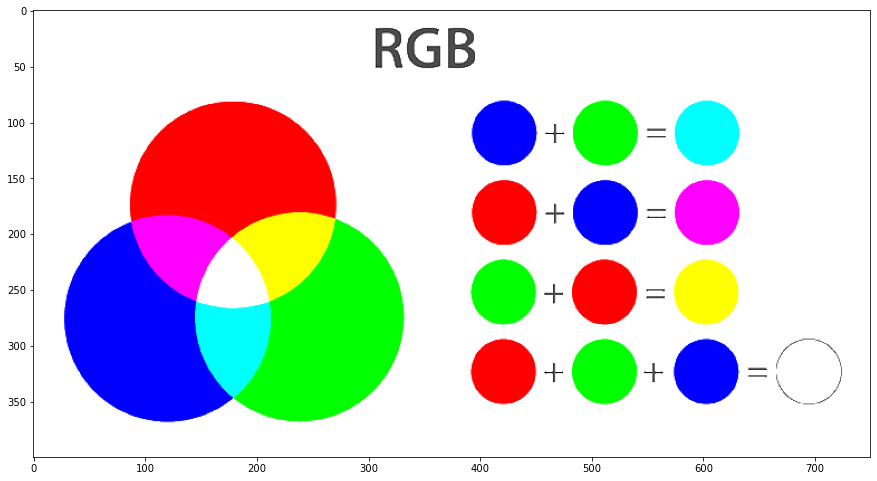

In [5]:
image = imread('image_02.jpg')

#coletando as camadas separadamente
red = image[:, :, 0]
green = image[:, :, 1]
blue = image[:, :, 2]

rows, columns, _ = image.shape

for r in range(rows):
    for c in range(columns):
        if (red[r,c] > 150):
            red[r,c] = 255
        if (green[r,c] > 150):
            green[r,c] = 255
        if (blue[r,c] > 150):
            blue[r,c] = 255
            
imagem_ajustada = []
imagem_ajustada = np.array(np.dstack((red, green, blue)), dtype=np.uint8)

imsave('imagem_ajustada_04.png', imagem_ajustada)

plt.figure(figsize=(15, 30))
plt.imshow(imagem_ajustada)


5) Aplique ruído em uma imagem utilizando a função "skimage.util.random_noise" com os seguites parâmentros: ‘s&p’, ‘gaussian’ e ‘speckle’. Cada um desses parâmetros irá gerar uma imagem com ruído. Após isso, aplique funções disponíveis em 'skimage.restoration' para recuperar as imagens.

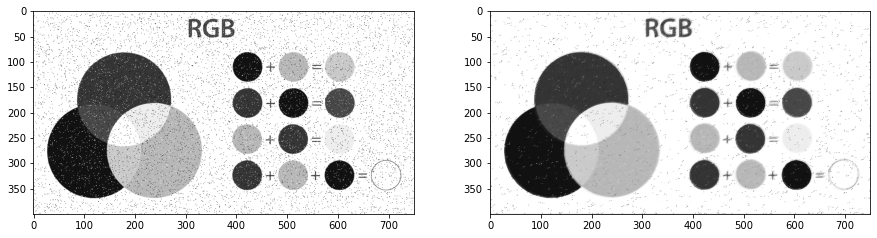

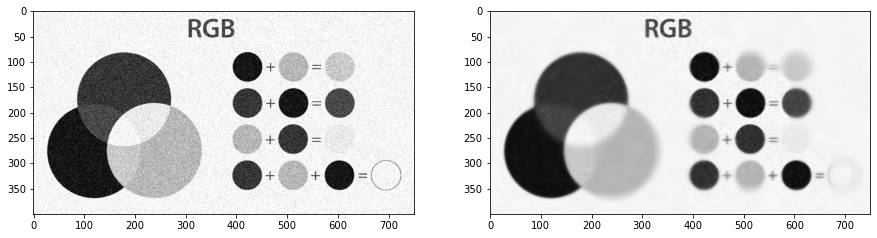

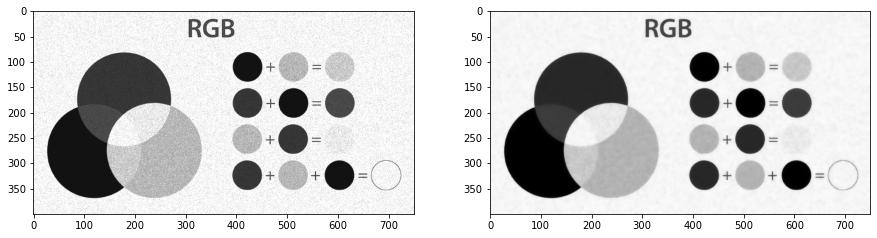

In [36]:
image = imread('image_02.jpg')
image = rgb2gray(image)

noisy_image_sEp = random_noise(image, mode='s&p')
noisy_image_sEp_restored = restoration.denoise_bilateral(noisy_image_sEp)

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(noisy_image_sEp, cmap='gray')
plt.subplot(2,2,2)
plt.imshow(noisy_image_sEp_restored, cmap='gray')

noisy_image_gaussian = random_noise(image, mode='gaussian')
noisy_image_gaussian_restored = restoration.denoise_nl_means(noisy_image_gaussian, 100)

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(noisy_image_gaussian, cmap='gray')
plt.subplot(2,2,2)
plt.imshow(noisy_image_gaussian_restored, cmap='gray')

noisy_image_speckle = random_noise(image, mode='speckle')
noisy_image_speckle_restored = restoration.denoise_tv_bregman(noisy_image_speckle)

plt.figure(figsize=(15,15))
plt.subplot(2,2,1)
plt.imshow(noisy_image_speckle, cmap='gray')
plt.subplot(2,2,2)
plt.imshow(noisy_image_speckle_restored, cmap='gray')


6) Aplique pelo menos 4 métodos diferentes para binarizar uma imagem ('skimage.filters').

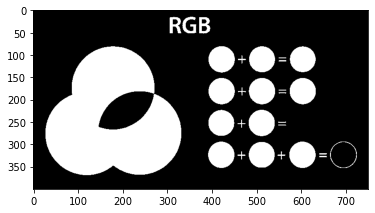

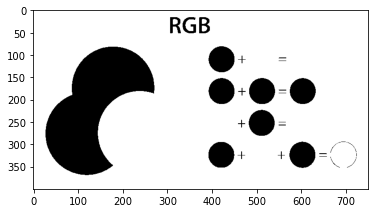

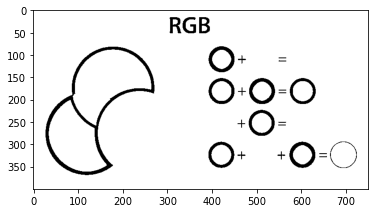

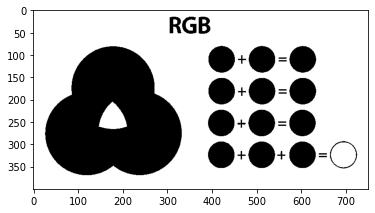

In [15]:
image = imread('image_02.jpg')
image = rgb2gray(image)

th_mean = filters.threshold_mean(image)
th_mean = (image < th_mean)
plt.imshow(th_mean, cmap='gray')
plt.show()

th_minimum = filters.threshold_minimum(image)
th_minimum = (image > th_minimum)
plt.imshow(th_minimum, cmap='gray')
plt.show()

th_sauvola = filters.threshold_sauvola(image)
th_sauvola = (image > th_sauvola)
plt.imshow(th_sauvola, cmap='gray')
plt.show()

th_triangle = filters.threshold_triangle(image)
th_triangle = (image > th_triangle)
plt.imshow(th_triangle, cmap='gray')
plt.show()


7) Aplique pelo menos 4 métodos diferentes ('skimage.filters') para calcular as bordas de uma imagem utilizando como entrada o resultado da questão anterior.

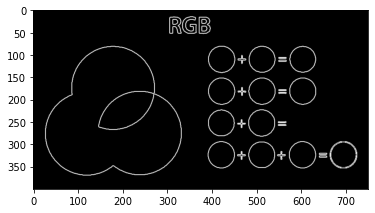

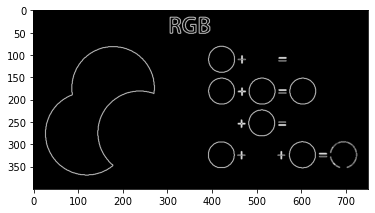

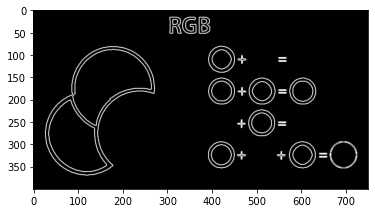

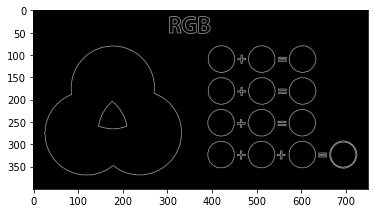

In [19]:
contorno_sobel = filters.sobel(th_mean)
plt.imshow(contorno_sobel,cmap = 'gray')
plt.show()

contorno_scharr = filters.scharr(th_minimum)
plt.imshow(contorno_scharr,cmap = 'gray')
plt.show()

contorno_prewitt = filters.prewitt(th_sauvola)
plt.imshow(contorno_prewitt,cmap = 'gray')
plt.show()

contorno_roberts = filters.roberts(th_triangle)
plt.imshow(contorno_roberts,cmap = 'gray')
plt.show()


8) Recorte uma imagem da seguinte forma:
- O corte será feito no canal de cor com a maior media de pixels.
- O centro do corte deve ser o pixel com o maior desvio padrão em uma janela 3x3.
- O tamanho do recorte será 1/4 do tamanho da imagem. Ex: Imagem 100 x 80 -> Recorte 25 x 20
- Cuidado com as bordas! Caso uma janela fique fora da imagem, o centro do recorte deverá ser alterado.

In [54]:
image = imread('image_02.jpg')

mean_red = np.mean(image[:, :, 0])
mean_green = np.mean(image[:, :, 1])
mean_blue = np.mean(image[:, :, 2])

print(mean_red, mean_green, mean_blue)

206.28694666666667 206.89547666666667 206.35649


In [55]:
dp = None
cut_center_r = None
cut_center_c = None
row, columns, _ = image.shape

if (mean_red >= mean_green) and (mean_red >= mean_blue):
    for r in range(row-3):
        for c in range(columns-3):
            if (dp == None) or (dp < np.std(image[r:r+3, c:c+3, 0])):
                cut_center_r = r
                cut_center_c = c
                dp = np.std(image[r:r+3, c:c+3, 0])
                
elif (mean_green >= mean_red) and (mean_green >= mean_blue):
    for r in range(row-3):
        for c in range(columns-3):
            if (dp == None) or (dp < np.std(image[r:r+3,c:c+3,1])):
                cut_center_r = r
                cut_center_c = c
                dp = np.std(image[r:r+3, c:c+3, 1])
                
elif (mean_blue >= mean_red) and (mean_blue >= mean_green):
    for r in range(row-3):
        for c in range(columns-3):
            if (dp == None) or (dp < np.std(image[r:r+3, c:c+3, 0])):
                cut_center_r = r
                cut_center_c = c
                dp = np.std(image[r:r+3, c:c+3, 0])
                
else:
    print("ErroR 404!!")
    
    
print(cut_center_r, cut_center_c, dp)


356 163 118.04152857844481


In [56]:
cut_area_r = int(row/4)
cut_area_c = int(columns/4)

print(row, columns)
print(cut_area_r, cut_area_c)


400 750
100 187


In [57]:
aux = None
if (cut_center_r + cut_area_r) > row:
    aux = (cut_center_r + cut_area_r) - row
    cut_center_r -= aux
    print(cut_center_r)
if (cut_center_c + cut_area_c) > columns:
    aux = (cut_center_c + cut_area_c) - columns
    cut_center_c -= aux
    print(cut_center_c)


300


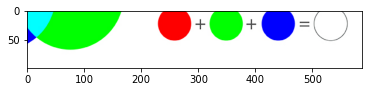

In [58]:
img_croped = image[cut_center_r:row, cut_center_c:columns]
plt.imshow(img_croped)


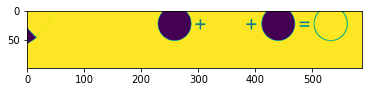

In [59]:
if (mean_red >= mean_green) and (mean_red >= mean_blue):
    img_croped_r = image[cut_center_r:row, cut_center_c:columns, 0]
    plt.imshow(img_croped_r)

elif (mean_green >= mean_red) and (mean_green >= mean_blue):
    img_croped_g = image[cut_center_r:row, cut_center_c:columns, 1]
    plt.imshow(img_croped_g)

elif (mean_blue >= mean_red) and (mean_blue >= mean_green):
    img_croped_b = image[cut_center_r:row, cut_center_c:columns, 2]
    plt.imshow(img_croped_b)

else:
    print("ErroR 404!!")
